In [1]:
import os, sys
# Root directory of the project
ROOT_DIR = os.path.abspath("../")

# To find local version of the library
sys.path.append(ROOT_DIR)

import numpy as np
import torch
from torchvision import transforms

from utils.dataloader import SVHNDataset
from utils.dataloader import prepare_dataloaders
from utils.transforms import FirstCrop, Rescale, RandomCrop, ToTensor
from utils.misc import load_obj
from utils.visualization import visualize_sample

import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2


In [2]:
train_metadata = ROOT_DIR + '/data/SVHN/train_metadata.pkl'
extra_metadata = ROOT_DIR + '/data/SVHN/extra_metadata.pkl'
train_extra_metadata = ROOT_DIR + '/data/SVHN/train_extra_metadata.pkl'

metadata_train = load_obj(train_metadata)
metadata_extra = load_obj(extra_metadata)
metadata_train_extra = load_obj(train_extra_metadata)

datadir = ROOT_DIR + '/data/SVHN/'

firstcrop = FirstCrop(0.3)
rescale = Rescale((64, 64))
random_crop = RandomCrop((54, 54))
to_tensor = ToTensor()

transform = transforms.Compose([firstcrop,
                                rescale,
                                random_crop,
                                to_tensor])


## Visualize samples

In [3]:
traindata = SVHNDataset(datadir, train_metadata)
extradata = SVHNDataset(datadir, extra_metadata)
trainextradata = SVHNDataset(datadir, train_extra_metadata)

Image index in dict:  84314


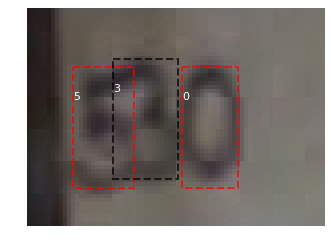

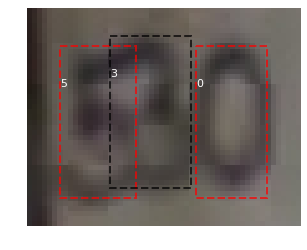

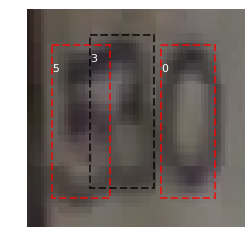

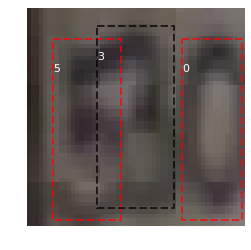

In [4]:
firstcrop = FirstCrop(0.3)
rescale = Rescale((64, 64))
random_crop = RandomCrop((54, 54))
to_tensor = ToTensor()

dataset = trainextradata
transform = transforms.Compose([firstcrop,
                                rescale,
                                random_crop,
                                ])

index = np.random.randint(len(dataset))
print("Image index in dict: ", index)
sample = dataset[index] 
visualize_sample(sample)

for i, tsfrm in enumerate([firstcrop, rescale, random_crop]):
    
    sample = tsfrm(sample)
    visualize_sample(sample)


## Get useful insight into data

In [5]:
n_digits_hist = np.zeros(7)

n_digits_train = 0
n_digits_extra = 0

for ii in metadata_train:
    
    n_digits = int(len(metadata_train[ii]['metadata']['label']))
    n_digits_train += n_digits
    if n_digits < 6:
        n_digits_hist[n_digits] += 1
    else:
        n_digits_hist[6] += 1

for ii in metadata_extra:
    
    n_digits = int(len(metadata_extra[ii]['metadata']['label']))

    n_digits_extra += n_digits
    
    if n_digits < 6:
        n_digits_hist[n_digits] += 1
    else:
        n_digits_hist[6] += 1

print('total number of digits: ', n_digits_train + n_digits_extra)
print('total number of sequences', sum(n_digits_hist))


total number of digits:  604388
total number of sequences 235755.0


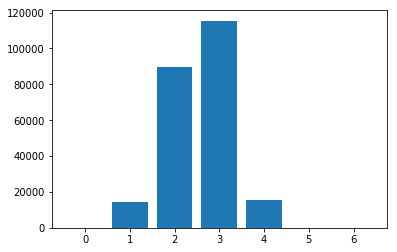

In [6]:
_ = plt.bar(np.arange(len(n_digits_hist)), n_digits_hist)


In [7]:
# Sanity check for total digits

tot = 0
for ii, jj in enumerate(n_digits_hist):
    tot += ii*jj
    
print(tot)


604388.0


In [8]:
# Get smallest dimensions of images possible
# Slow since you have to load every image into memory
im_width = []
im_height =  []
for jj in range(len(traindata)):
    
    shape = np.asarray(traindata[jj]['image']).shape
    im_height.append(shape[0])
    im_width.append(shape[1])
    
im_width = np.asarray(im_width)
im_height = np.asarray(im_height)


In [9]:
# Explore dataset for cleaning
# Minimum width and height of images
print("minimum image width", np.min(im_width))
print("minimum image height", np.min(im_height))

total = np.sum(np.logical_or(im_height < 28, im_width < 28))

print('total number of image in dataset: ', len(traindata))
print('total number of images that are too small', total)


minimum image width 25
minimum image height 12
total number of image in dataset:  33402
total number of images that are too small 5504


{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=37x12 at 0x7EFDAFC56F60>, 'metadata': {'labels': [1, 3], 'boxes': array([[ 9, 17,  1, 12],
       [19, 28,  1, 12]]), 'filename': '/home/jerpint/digit-detection/data/SVHN/train/1814.png'}}
[1, 3]


(12, 37, 3)

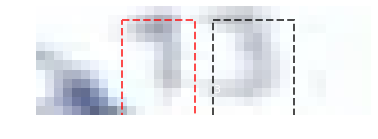

In [10]:
# Show sample image that is too small

index = np.argmin(im_height)
sample = traindata[index]
visualize_sample(sample)

print(sample)

print(sample['metadata']['labels'])
np.asarray(sample['image']).shape
